# Home Assignment 1

## Problem 1 (1 point). My Hashrate

This is a simple implemetation of Proof-of-Work function.
It takes current block header and block calculation difficulty as inputs and returns nonce for this block and the header of a mined block.

In [438]:
import hashlib

def proof_of_work(header, target):
    max_nonce = 2 ** 32
    for nonce in range(max_nonce):
        hash_result = hashlib.sha256(str(header).encode('utf-8')+str(nonce).encode('utf-8')).hexdigest()

        if int(hash_result, 16) < target:
            return (hash_result, nonce)

The genesis block is calulated here.

In [439]:
import time

nonce = 0
block_hash = ""
new_block = 'This is the genesis block' + block_hash

difficulty_bits = 8
target = 2 ** (256-difficulty_bits)

start_time = time.time()
(block_hash, nonce) = proof_of_work(new_block, target)
end_time = time.time()
elapsed_time = end_time - start_time

print("Success with nonce ", nonce)
print("Hash is ", block_hash)
print("Elapsed time: %.4f seconds" % elapsed_time)

Success with nonce  186
Hash is  005eaab75f55d7cef91c03f04052043056113f6ee14abfcf4a0562a019aa1cbe
Elapsed time: 0.0008 seconds


### Task

Choose such a target that you will calculated 20 160 000 blocks per 14 days in avarage. Prove it experimetally (estimate time for at least 1000 blocks; compute both mean and standard deviation of a single block generation).

*Note.* Each next block should be calculated using the hash of the previous one.

In [447]:
20160000/(14*24*60*60) 

16.666666666666668


<span style="color:gray">It means we need to generate about 17 per second, so in the next script I measured the time needed to generate 17 blocks for diffrent needed_difficulty_bits, and when I got a 17 blocks in more than 0.8 sec, I chose that needed_difficulty_bits, and by it I calculated the target </span>.

In [440]:
# code here

import time

block_hash = ""
new_block = 'This is the genesis block' + block_hash
needed_target = 0;
needed_difficulty_bits = 0;
for difficulty_bits in range(256):
    target = 2 ** (256-difficulty_bits)
    start_time = time.time()
    for block_number in range(17):
        (block_hash, nonce) = proof_of_work(new_block, target)
        new_block = block_hash
    end_time = time.time()
    ttime = end_time - start_time
    if (ttime > 0.8):
        needed_target = target
        needed_difficulty_bits = difficulty_bits;
        break;
needed_target, needed_difficulty_bits


(3533694129556768659166595001485837031654967793751237916243212402585239552, 15)

#### the prove

In [442]:
block_hash = ""
new_block = 'This is the genesis block' + block_hash
target = 2 ** (256-needed_difficulty_bits)
   
timeList = []
for block_number in range(1000):
    start_time = time.time()
    (block_hash, nonce) = proof_of_work(new_block, target)
    new_block = block_hash
    end_time = time.time()
    timeList.append(end_time - start_time)
sum(timeList) / float(len(timeList))

0.059665329933166505

In [444]:
import numpy as np
timeArray = np.array(timeList)
print('mean: ', timeArray.mean())
print('standard deviation: ', timeArray.std())


mean:  0.059665329933166505
standard deviation:  0.06399927792818019


## the right target is

2<sup>256 - needed_difficulty_bits</sup>


In [443]:
needed_difficulty_bits

15

## Problem 2 (3 + 3* points). Merkle tree

Merkle hash trees play an important role in forming transaction blocks in blockchain. In this assignment we ask you to plot your own Merkle hash tree and check its' properties. Below we provide you with some code fragment what you can use in your assignment

In [6]:
import matplotlib
import networkx as nx
%matplotlib qt5
from networkx import balanced_tree, draw_networkx, draw

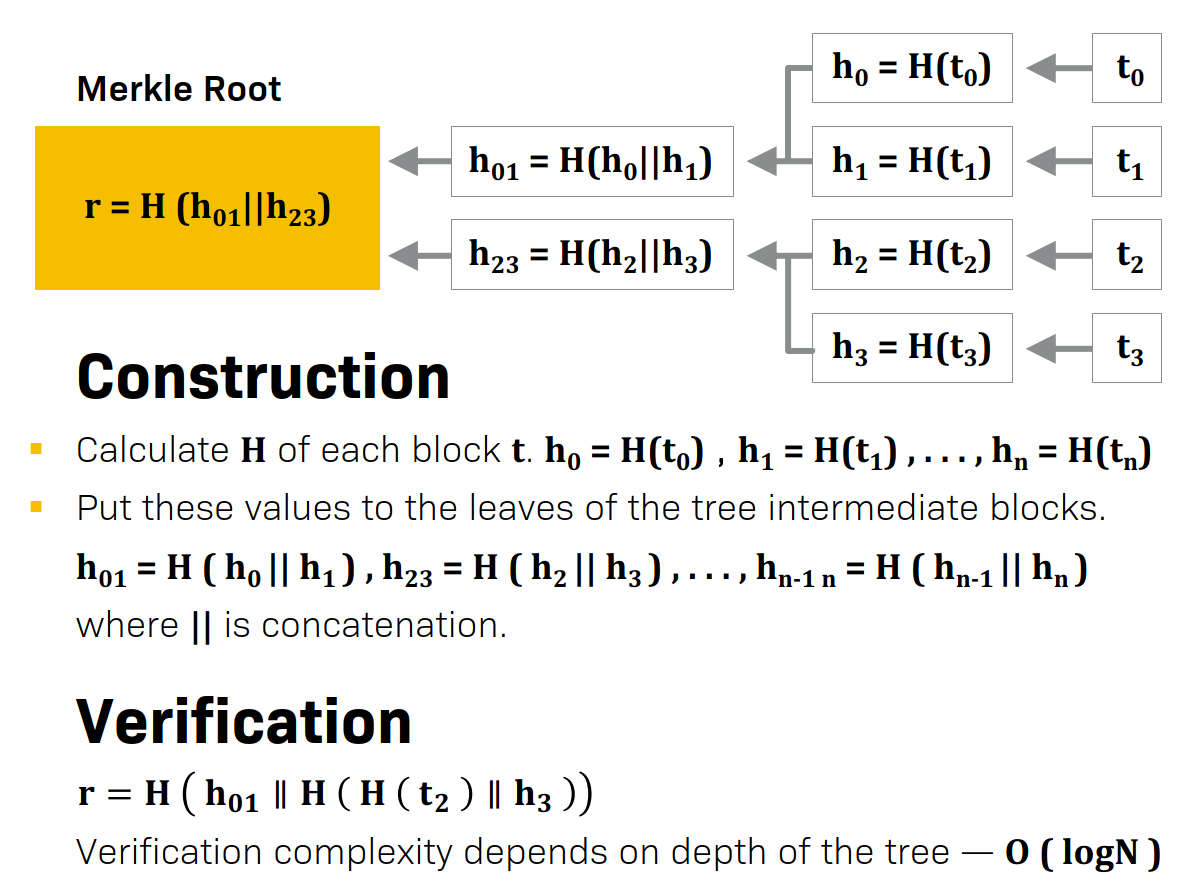

Let us plot graph basis for Merkle hash tree

In [145]:
G = nx.Graph()
positions = {}
coordinates = [
    [0, 4],
    [-5, 3],
    [5, 3],
    [-10, 2],
    [-3, 2],
    [3, 2],
    [10, 2],
    [-10, 1],
    [-3, 1],
    [3, 1],
    [10, 1]
]
parents = [0, 0, 0, 1, 1, 2, 2, 3, 4, 5, 6]
for index in range(11):
    G.add_node(index)
    G.add_edge(index, parents[index])
    positions[index] = coordinates[index]
nx.draw(G, positions, node_size = 1000)
labels = {
    0: '0',
    1: '1',
    2: '2',
    3: '3',
    4: '4',
    5: '5',
    6: '6',
    7: 'tx1',
    8: 'tx2',
    9: 'tx3',
    10: 'tx4',
}
nx.draw_networkx_labels(G, positions, labels = labels)

{0: Text(0, 4, '0'),
 1: Text(-5, 3, '1'),
 2: Text(5, 3, '2'),
 3: Text(-10, 2, '3'),
 4: Text(-3, 2, '4'),
 5: Text(3, 2, '5'),
 6: Text(10, 2, '6'),
 7: Text(-10, 1, 'tx1'),
 8: Text(-3, 1, 'tx2'),
 9: Text(3, 1, 'tx3'),
 10: Text(10, 1, 'tx4')}

In [146]:
labels_copy = labels.copy()

In Bitcoin double sha256 hash scheme is used. Here is an example.

In [147]:
import hashlib


first_hash = hashlib.sha256(b"hello") # "b" stands for binary representation
second_hash = hashlib.sha256()
print('First hash represented as a hexadecimal number:', first_hash.hexdigest())
second_hash.update(first_hash.digest())
print('Second hash represented as a hexadecimal number:', second_hash.hexdigest())

First hash represented as a hexadecimal number: 2cf24dba5fb0a30e26e83b2ac5b9e29e1b161e5c1fa7425e73043362938b9824
Second hash represented as a hexadecimal number: 9595c9df90075148eb06860365df33584b75bff782a510c6cd4883a419833d50


Now we can easily change vertices' labels to hashes of corresponding messages and plot new graph

In [148]:
# labels[3] = hashlib.sha256(hashlib.sha256(b"tx1").digest()).hexdigest()

# # and plot the graph again

# nx.draw(G, positions, node_size = 1000)
# nx.draw_networkx_labels(G, positions, labels = labels, font_size = 8)

1) Construct Merkle hash tree using previously constructed graph by finding corresponding SHA256 hashes on vertices and plot obtained Merkle hash tree (1 point)

In [149]:
# it finds the children of element which index was passed
def findChildren(parents, index):
    children = []
    for i, item in enumerate(parents):
        if(index == 0 and i == 0):
            continue
        if(item == index):
            children.append(i)
    return children

In [150]:
# just to escape from this long formula )))
def hashMe256(item):
    return hashlib.sha256(hashlib.sha256(item.encode('utf-8')).digest()).hexdigest()

In [151]:
# give it the start index of lables list and it will calculate the hash of tree. Cool, right:)?
def hashTree(index):
    children = findChildren(parents, index)
    if(len(children) == 2):
        labels_copy[index] = hashMe256(hashTree(children[0]) + hashTree(children[1]))
        return labels_copy[index];
    elif(len(children) == 1):
        childChildren = findChildren(parents, children[0])
        if(len(childChildren) > 0):
            hashElement = hashMe256(hashTree(children[0]))
            labels_copy[index] = hashMe256(hashElement + hashElement)
            return labels[index]
        else:
            labels_copy[index] = hashMe256(labels[children[0]])
            return labels_copy[index]

In [152]:
# hashing the given tree
hashTree(0)  
    
nx.draw(G, positions, node_size = 1000)
nx.draw_networkx_labels(G, positions, labels = labels_copy, font_size = 8)

{0: Text(0, 4, '5eaee129fb6c4761a542e919f8fd0fa3f3c3d83a33bbeeec5a7e8772ddfb8f88'),
 1: Text(-5, 3, '41925fc3630f375e23755f04099f1b2c51f372a9792762b28478fbbc5faf1106'),
 2: Text(5, 3, '5c72c2fc6c2ed732c66fa8dc63f163617be1eb6175b88b3b640f440abb236e73'),
 3: Text(-10, 2, '856a4921cd32690244af7568e7bd1391a94119e17c7f33234f4bf11271b223e5'),
 4: Text(-3, 2, '79043a4d1d4d6d0b830519bfc07b92b4d162a4cd54235719c2c3cc211a638dfd'),
 5: Text(3, 2, 'ef729c31d206229249bd791b29676d26cc7465aa6bc2003d80c7a82a316e0233'),
 6: Text(10, 2, '4746dc9c16f97469fa45710394c4a0e2f29226efc04cab47c29ce579ae19a74e'),
 7: Text(-10, 1, 'tx1'),
 8: Text(-3, 1, 'tx2'),
 9: Text(3, 1, 'tx3'),
 10: Text(10, 1, 'tx4')}

2) Provide a proof of correctness of leaf tx1 and set of leafs tx1-tx2 (1 point)

In [153]:
# finds brothers of an elements which index was passed
def findBrotherHashs(index, parents):
    brothers = []
    parent = parents[index]
    for i, par in enumerate(parents):
        if(par == parent and i != 0):
            brothers.append(labels_copy[i]) 
    return brothers

In [154]:
# calculate the merekale root of given index element
def getRootHash(index, hashElement):
    if(index == 0):
        return hashElement
    brothers = findBrotherHashs(index, parents)
    if (len(brothers) == 0):
        return None
    if (len(brothers) == 1):
        return getRootHash(parents[index], hashMe256(brothers[0] + brothers[0]))
    if(len(brothers) == 2):
        brothers.index(hashElement)
        return getRootHash(parents[index], hashMe256(brothers[0] + brothers[1]))
    return None

In [155]:
# checks one leaf if its containe in tree
def checkLeaf(leaf):
    hashTrans = hashMe256(leaf)
    indexOfElement = list(labels.values()).index(leaf)
    rootHash = labels_copy[0]
    calculatedRootHash = getRootHash(parents[indexOfElement], hashTrans)
    if(rootHash == calculatedRootHash):
        return True
    return False

In [156]:
# code
leafToCheck = 'tx1'
checkLeaf(leafToCheck)

True

-----------------------------------------------------------------------------------------------------


In [157]:
# calculate the merekale root when passing two transactions
def getRootHash2Leafs(index1, index2, hashElement1, hashElement2):
    # the try expect block is only to catch errors of this function: LIST.index(VALUE), 
    # because it returns error when the VALUE is not found in the list
     try:
        hash1 = ''
        hash2 = ''
        if (index1 == 0 and index2 == 0):
            return hashElement1
        brothers1 = findBrotherHashs(index1, parents)
        brothers2 = findBrotherHashs(index2, parents)
        if (brothers1 == brothers2):
            brothers1.index(hashElement1)
            brothers1.index(hashElement2)
            resHash = hashMe256(brothers1[0] + brothers1[1])
            return getRootHash2Leafs(parents[index1], parents[index2], resHash, resHash)

        if (len(brothers1) == 0 or len(brothers2) == 0):
            return None

        if (len(brothers1) == 1):
            hash1 = hashMe256(brothers1[0] + brothers1[0])
        elif (len(brothers1) == 2):
            brothers1.index(hashElement1)
            hash1 = hashMe256(brothers1[0] + brothers1[1])

        if (len(brothers2) == 1):
            hash2 = hashMe256(brothers2[0] + brothers2[0])
        elif (len(brothers2) == 2):
            brothers2.index(hashElement2)
            hash2 = hashMe256(brothers2[0] + brothers2[1])    

        if (coordinates[index1][1] > coordinates[index2][1]):
            return getRootHash2Leafs(index1, parents[index2], hashElement1, hash2)
        elif (coordinates[index1][1] < coordinates[index2][1]):
            return getRootHash2Leafs(parents[index1], index2, hash1, hashElement2)
        else:
            return getRootHash2Leafs(parents[index1], parents[index2], hash1, hash2)
        return None
     except:
        return None

In [158]:
# checks if the two transactions related to the tree
def check2Leafs(leaf1, leaf2):
    hashTrans1 = hashMe256(leaf1)
    hashTrans2 = hashMe256(leaf2)
    indexOfElement1 = list(labels.values()).index(leaf1)
    indexOfElement2 = list(labels.values()).index(leaf2)
    rootHash = labels_copy[0]
    calculatedRootHash = getRootHash2Leafs(parents[indexOfElement1], parents[indexOfElement2], hashTrans1, hashTrans2)
    if(rootHash == calculatedRootHash):
        return True
    return False

In [159]:
leafToCheck1 = 'tx1'
leafToCheck2 = 'tx2'
check2Leafs(leafToCheck1, leafToCheck2)

True

3) Change the value on leaf tx1 and recompute corresponding hashes. Plot newly obtained Merkle hash tree (1 point)

In [160]:
# code
labels_copy_copy = labels_copy.copy()
orig_label = labels.copy()

In [161]:
index_ = list(orig_label.values()).index('tx1')
labels[index_] = 'tax'
labels_copy[index_] = 'tax'
labels

{0: '0',
 1: '1',
 2: '2',
 3: '3',
 4: '4',
 5: '5',
 6: '6',
 7: 'tax',
 8: 'tx2',
 9: 'tx3',
 10: 'tx4'}

In [162]:
labels_copy_copy

{0: '5eaee129fb6c4761a542e919f8fd0fa3f3c3d83a33bbeeec5a7e8772ddfb8f88',
 1: '41925fc3630f375e23755f04099f1b2c51f372a9792762b28478fbbc5faf1106',
 2: '5c72c2fc6c2ed732c66fa8dc63f163617be1eb6175b88b3b640f440abb236e73',
 3: '856a4921cd32690244af7568e7bd1391a94119e17c7f33234f4bf11271b223e5',
 4: '79043a4d1d4d6d0b830519bfc07b92b4d162a4cd54235719c2c3cc211a638dfd',
 5: 'ef729c31d206229249bd791b29676d26cc7465aa6bc2003d80c7a82a316e0233',
 6: '4746dc9c16f97469fa45710394c4a0e2f29226efc04cab47c29ce579ae19a74e',
 7: 'tx1',
 8: 'tx2',
 9: 'tx3',
 10: 'tx4'}

In [163]:
hashTree(0)  
    
nx.draw(G, positions, node_size = 1000)
nx.draw_networkx_labels(G, positions, labels = labels_copy, font_size = 8)

{0: Text(0, 4, 'fa10b19b048429d3111f317c0267de052fbdf0333890fd3fbd0899a995b271d0'),
 1: Text(-5, 3, '3d8fc39d7a446b19c5341d7491036e2343563e68b5aa00f810b6c4c5eadc1462'),
 2: Text(5, 3, '5c72c2fc6c2ed732c66fa8dc63f163617be1eb6175b88b3b640f440abb236e73'),
 3: Text(-10, 2, '166ae669ce23c7ed2053b0cc3c13bef2ed893490aa0e5e594ec79ea4b8d5f491'),
 4: Text(-3, 2, '79043a4d1d4d6d0b830519bfc07b92b4d162a4cd54235719c2c3cc211a638dfd'),
 5: Text(3, 2, 'ef729c31d206229249bd791b29676d26cc7465aa6bc2003d80c7a82a316e0233'),
 6: Text(10, 2, '4746dc9c16f97469fa45710394c4a0e2f29226efc04cab47c29ce579ae19a74e'),
 7: Text(-10, 1, 'tax'),
 8: Text(-3, 1, 'tx2'),
 9: Text(3, 1, 'tx3'),
 10: Text(10, 1, 'tx4')}

4*) Implement a function to support the number of leafs $n =5, .., 16$. Let the value in the leaf $i$ be $txi$. Plot the tree. Provide the proof of correctness of leaf tx4 and set of leafs tx4-tx5 (3 bonus points)


<span style="color:red">NOTE: the Implement of the function already up, so I wil just use it </span>.

<span style="color:red">I will only plot one tree which contains 10 leafs </span>.

In [164]:
# code
G = nx.Graph()
positions = {}
coordinates = [
    [0, 6],
    [-6, 5],
    [6, 5],
    [-10, 4],
    [-4, 4],
    [4, 4],
    [8, 4],
    [-13, 3],
    [-9, 3],
    [-5, 3],
    [-3, 3],
    [3, 3],
    [5, 3],
    [7, 3],
    [9, 3],
    [-14, 2],
    [-12, 2],
    [-10, 2],
    [-8, 2],
    [-5, 2],
    [-3, 2],
    [3, 2],
    [5, 2],
    [7, 2],
    [9, 2],
    [-14, 1],
    [-12, 1],
    [-10, 1],
    [-8, 1],
]
parents = [0, 0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
for index in range(29):
    G.add_node(index)
    G.add_edge(index, parents[index])
    positions[index] = coordinates[index]
nx.draw(G, positions, node_size = 1000)
labels = {
    0: '0',
    1: '1',
    2: '2',
    3: '3',
    4: '4',
    5: '5',
    6: '6',
    7: '7',
    8: '8',
    9: '9',
    10: '10',
    11: '11',
    12: '12',
    13: '13',
    14: '14',
    15: '15',
    16: '16',
    17: '17',
    18: '18',
    19: 'tx1',
    20: 'tx2',
    21: 'tx3',
    22: 'tx4',
    23: 'tx5',
    24: 'tx6',
    25: 'tx7',
    26: 'tx8',
    27: 'tx9',
    28: 'tx10',
}
nx.draw_networkx_labels(G, positions, labels = labels)

{0: Text(0, 6, '0'),
 1: Text(-6, 5, '1'),
 2: Text(6, 5, '2'),
 3: Text(-10, 4, '3'),
 4: Text(-4, 4, '4'),
 5: Text(4, 4, '5'),
 6: Text(8, 4, '6'),
 7: Text(-13, 3, '7'),
 8: Text(-9, 3, '8'),
 9: Text(-5, 3, '9'),
 10: Text(-3, 3, '10'),
 11: Text(3, 3, '11'),
 12: Text(5, 3, '12'),
 13: Text(7, 3, '13'),
 14: Text(9, 3, '14'),
 15: Text(-14, 2, '15'),
 16: Text(-12, 2, '16'),
 17: Text(-10, 2, '17'),
 18: Text(-8, 2, '18'),
 19: Text(-5, 2, 'tx1'),
 20: Text(-3, 2, 'tx2'),
 21: Text(3, 2, 'tx3'),
 22: Text(5, 2, 'tx4'),
 23: Text(7, 2, 'tx5'),
 24: Text(9, 2, 'tx6'),
 25: Text(-14, 1, 'tx7'),
 26: Text(-12, 1, 'tx8'),
 27: Text(-10, 1, 'tx9'),
 28: Text(-8, 1, 'tx10')}

In [165]:
labels_copy = labels.copy()

In [166]:
hashTree(0) 
    
nx.draw(G, positions, node_size = 1000)
nx.draw_networkx_labels(G, positions, labels = labels_copy, font_size = 8)

{0: Text(0, 6, '41c985d1156136941e3cc5a5943b385d8f0a30c822b77ce14cb8c9f71452f03d'),
 1: Text(-6, 5, 'b65f5c54cae9d6875e41e50a9ea7133d069a0b9330f509720733d1c8cc2a694b'),
 2: Text(6, 5, '9b204441c6f12823dd35e2b0609316f1eccf853cc7552d5ec6df6c39a1595d1e'),
 3: Text(-10, 4, '188e11bfc4436032d630bf46fa9391c828c21234dca6e69914cf6f391ec8e560'),
 4: Text(-4, 4, '41925fc3630f375e23755f04099f1b2c51f372a9792762b28478fbbc5faf1106'),
 5: Text(4, 4, '5c72c2fc6c2ed732c66fa8dc63f163617be1eb6175b88b3b640f440abb236e73'),
 6: Text(8, 4, 'd6729da948be8eb1fddfc506ce39885194787a93bef6b3ab9086e1685bddfc2f'),
 7: Text(-13, 3, 'ea7690966598257569c816a598a57638cfd7b0b1e43b1bf5d0a62f4de981a7e8'),
 8: Text(-9, 3, '6bb20dd0d630085f7cce8f0c3b4517bd4c9ded476a77759fb0a93f74c017bdb5'),
 9: Text(-5, 3, '856a4921cd32690244af7568e7bd1391a94119e17c7f33234f4bf11271b223e5'),
 10: Text(-3, 3, '79043a4d1d4d6d0b830519bfc07b92b4d162a4cd54235719c2c3cc211a638dfd'),
 11: Text(3, 3, 'ef729c31d206229249bd791b29676d26cc7465aa6bc2003d8

In [167]:
leafToCheck = 'tx4'
checkLeaf(leafToCheck)

True

In [168]:
leafToCheck1 = 'tx4'
leafToCheck2 = 'tx5'
check2Leafs(leafToCheck1, leafToCheck2)

True

## Problem 3 (6 + 2* points). Fork rate and main chain

Two miners are the only maintainers of the network. Each miner needs a random time to generate a new block which is modeled as exponential random variables with the rates $1/t_1$ and $1/t_2$ correspondingly. I.e. each miner generates Poisson point process of new blocks. The network is not ideal and it takes a random time to synchronize the block. The synchronization is modeled as an exponential random variable with the rate $1/t_0$. We assume both miners be honest and continue the longest known chain.

*Note.* The Poisson point process has memoryless and superposition properties [1]. So we can model three Poisson point processes independently and omit synchronization events if already synced.

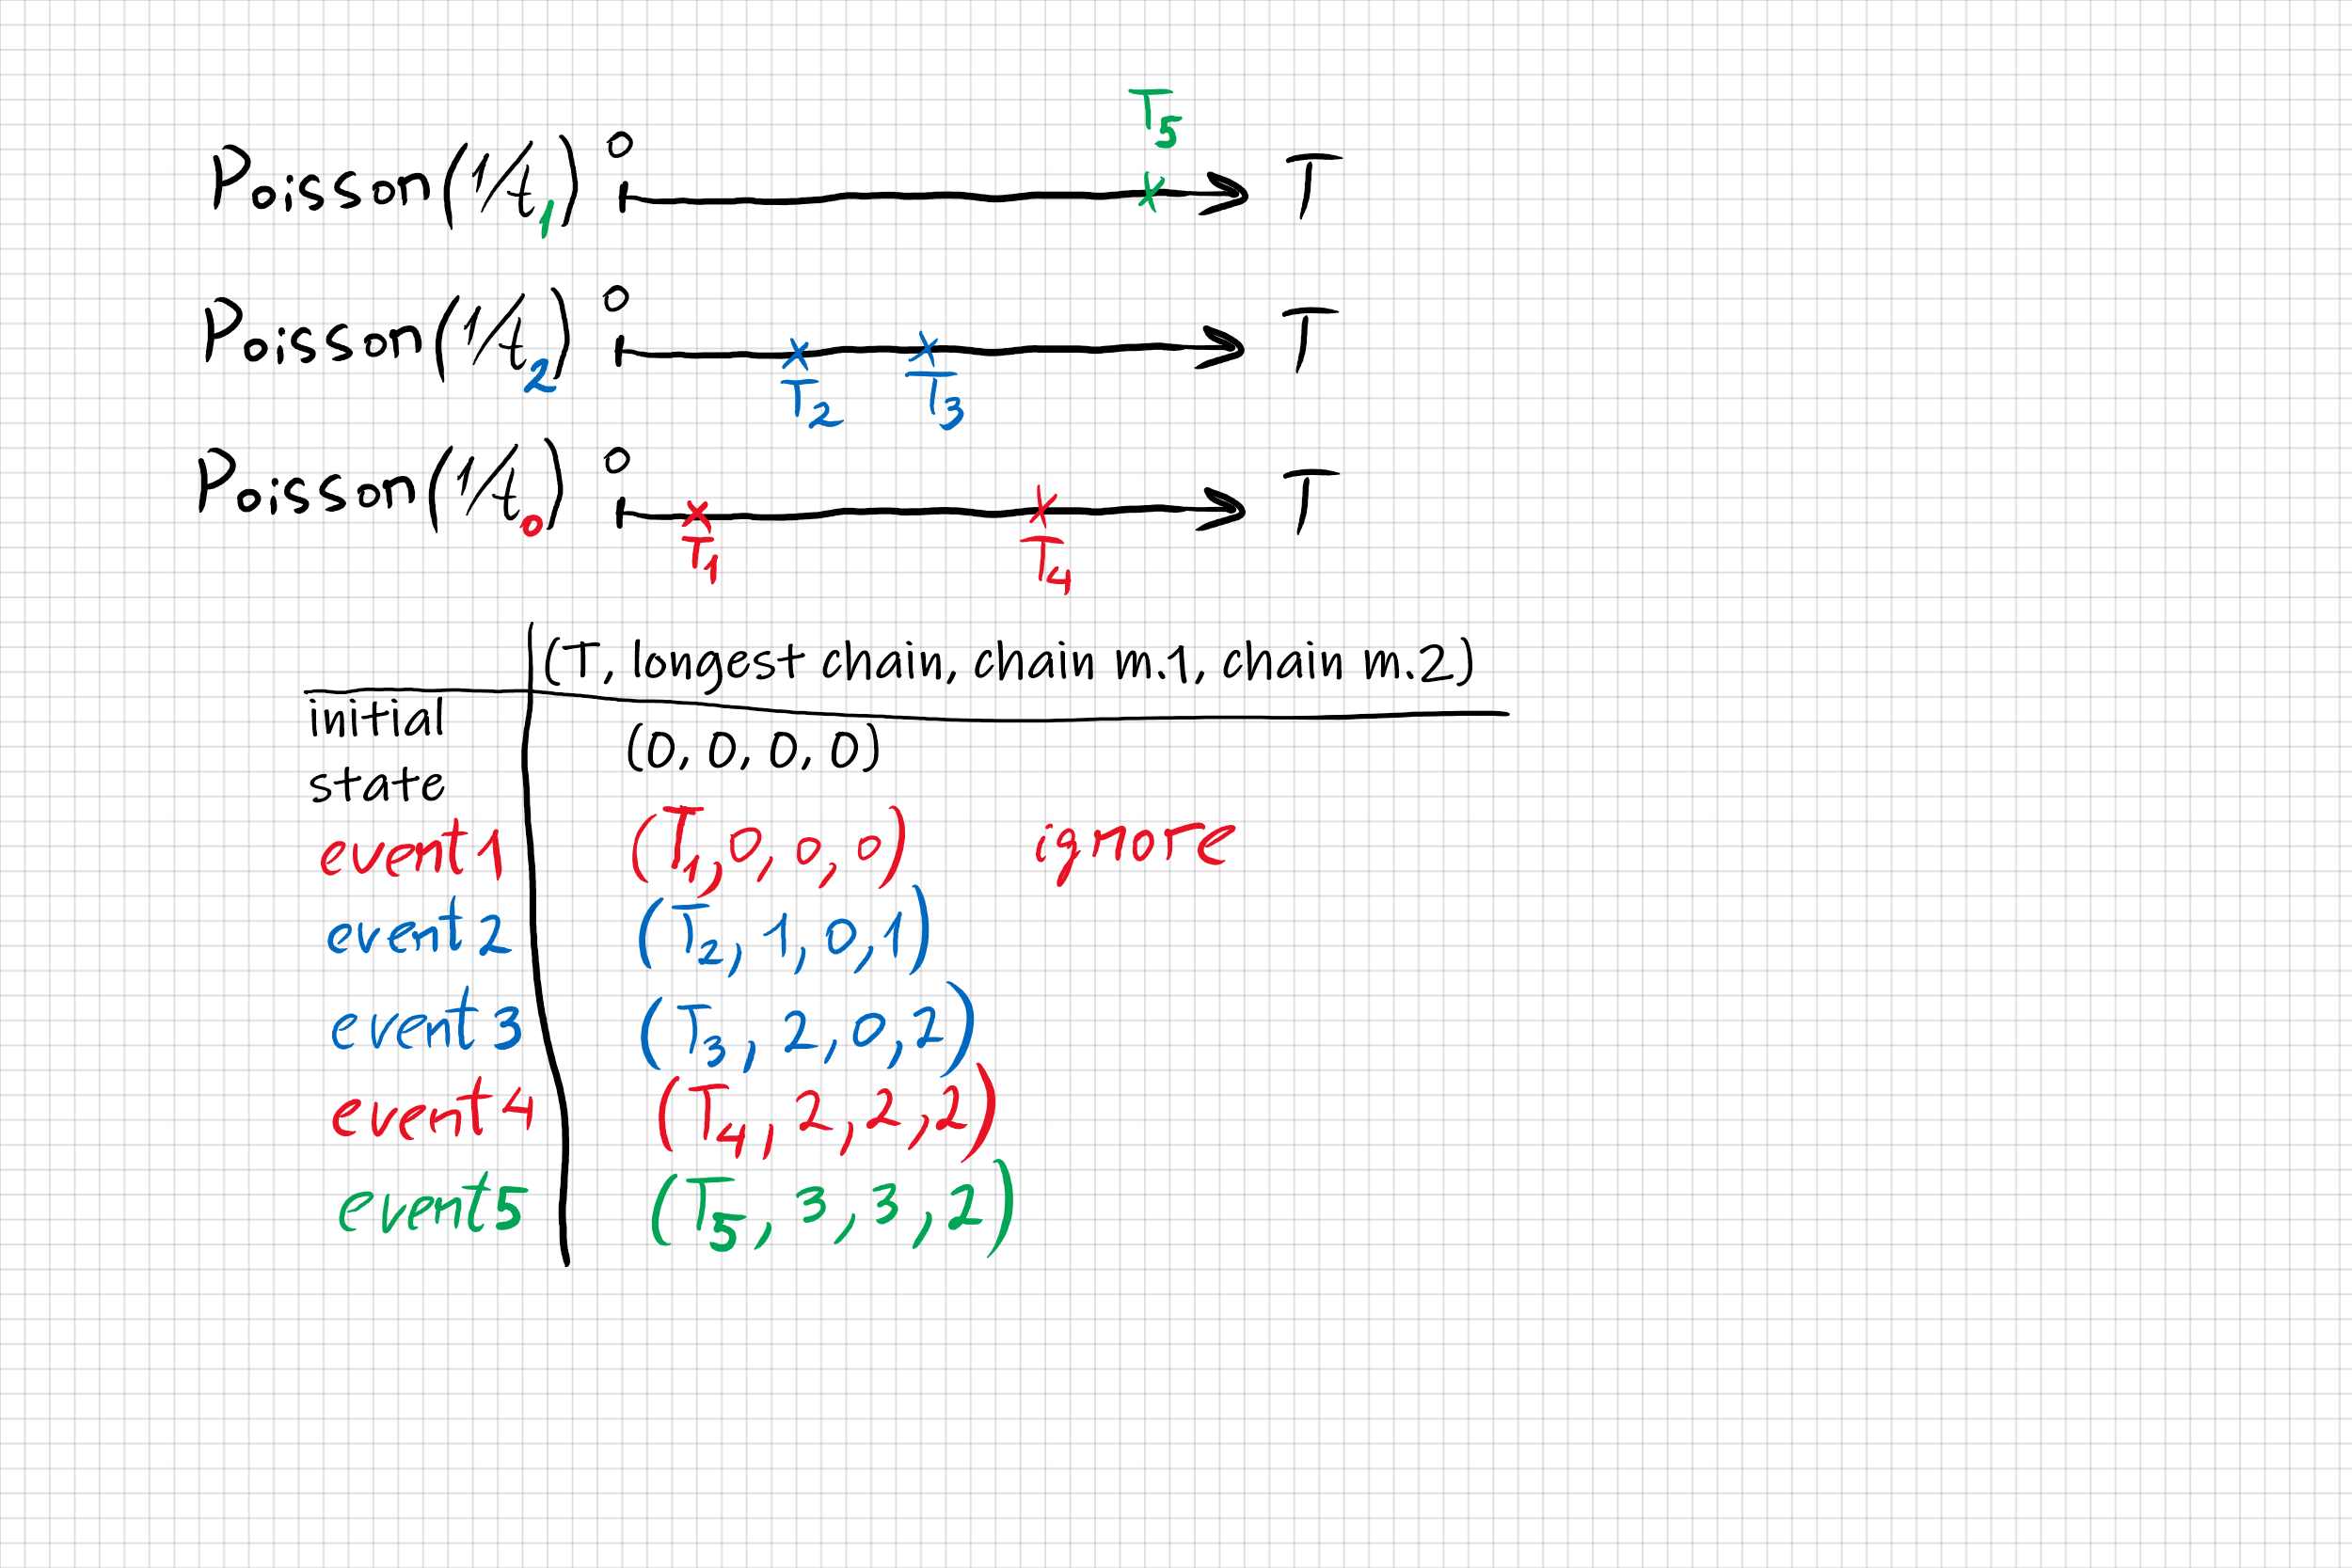

\[1\] Daley, Daryl J.; Vere-Jones, David (2003). An Introduction to the Theory of Point Processes: Volume I: Elementary Theory and Methods. Springer. ISBN 978-1475781090.

1) Implement a function to generate a sequence of tuples (time, longest chain, longest chain for miner 1, longest chain for miner 2) and run it for $t_1=t_2=1, t_0=0.5$ (1 point)

In [171]:
import numpy as np
import scipy.stats

In [318]:
def generateSequenceEvents(t0, t1, t2, time_interval_to_simulate = 10.):
    
    # miner 1 mines at Ts
    number_of_blocks_miner_1 = scipy.stats.poisson(time_interval_to_simulate * (1/t1)).rvs()
    event_times_miner_1 =  sorted(scipy.stats.uniform.rvs(loc=0, 
                                                          scale=time_interval_to_simulate, 
                                                          size=number_of_blocks_miner_1))
    # miner 2 mines at Ts
    number_of_blocks_miner_2 = scipy.stats.poisson(time_interval_to_simulate * (1/t2)).rvs()
    event_times_miner_2 =  sorted(scipy.stats.uniform.rvs(loc=0, 
                                                          scale=time_interval_to_simulate, 
                                                          size=number_of_blocks_miner_2))
    # sync number and events
    number_of_syncs = scipy.stats.poisson(time_interval_to_simulate * (1/t0)).rvs()
    event_times_syncs =  sorted(scipy.stats.uniform.rvs(loc=0, 
                                                          scale=time_interval_to_simulate, 
                                                          size=number_of_syncs))
    # this way is faster then mergeing all lists then sorting it then read the result list
    # its just kind of moving into all lists in the same time)))
    events = [[0, 0, 0, 0]]
    numGeneratedblocks_1 = 0
    numGeneratedblocks_2 = 0
    i = j = k = 0
    while True:
        lastEvent = events[-1]
        if(i >= len(event_times_miner_1) - 1 
           and j >= len(event_times_miner_2) - 1 
           and k >= len(event_times_syncs) - 1
          ):
            break
        if (number_of_syncs == 0):
            minTime = min(event_times_miner_1[i], event_times_miner_2[j])
        else:
            minTime = min(event_times_miner_1[i], event_times_miner_2[j], event_times_syncs[k])
        if (minTime == event_times_miner_1[i]):
            numGeneratedblocks_1 += 1
            events.append([minTime, lastEvent[1], lastEvent[2] + 1, lastEvent[3]])
            if ( i + 1 == len(event_times_miner_1)):
                event_times_miner_1[i] = time_interval_to_simulate + 1
            else:
                i += 1
        elif (minTime == event_times_miner_2[j]):
            numGeneratedblocks_2 += 1
            events.append([minTime, lastEvent[1], lastEvent[2], lastEvent[3] + 1])
            if ( j + 1 == len(event_times_miner_2)):
                event_times_miner_2[j] = time_interval_to_simulate + 1
            else:
                j += 1
        elif (minTime == event_times_syncs[k]):
            events.append([minTime, max(numGeneratedblocks_1, numGeneratedblocks_2), max(numGeneratedblocks_1, numGeneratedblocks_2), max(numGeneratedblocks_1, numGeneratedblocks_2)])
            if ( k + 1 >= len(event_times_syncs)):
                event_times_syncs[k] = time_interval_to_simulate + 1
            else:
                k += 1    
    return (events, numGeneratedblocks_1, numGeneratedblocks_2)

In [319]:
# code
historyOfEvents, numGeneratedblocks_1, numGeneratedblocks_2 = generateSequenceEvents(0.5, 1, 1)
historyOfEvents

[[0, 0, 0, 0],
 [0.007105406029467298, 0, 0, 0],
 [0.24351745238313183, 0, 1, 0],
 [0.3388921271743639, 0, 1, 1],
 [0.5084706816617879, 1, 1, 1],
 [0.8148672157953407, 1, 1, 2],
 [1.0667911505198235, 1, 2, 2],
 [1.533166390179559, 2, 2, 2],
 [2.3231468888014897, 2, 2, 2],
 [2.3878152077551364, 2, 2, 2],
 [2.694223597375489, 2, 2, 3],
 [2.7389935358487847, 2, 3, 3],
 [3.1198504619701053, 3, 3, 3],
 [3.289497388540731, 3, 3, 4],
 [3.8917649532895093, 4, 4, 4],
 [4.403295981984371, 4, 5, 4],
 [4.498326965324365, 4, 5, 5],
 [4.950245262069496, 4, 5, 6],
 [5.219057811638617, 6, 6, 6],
 [6.244611475800431, 6, 7, 6],
 [6.316286114039743, 6, 8, 6],
 [6.372972557994748, 6, 6, 6],
 [6.396824843842048, 6, 6, 6],
 [6.503958739475325, 6, 6, 7],
 [6.8552060139559945, 7, 7, 7],
 [7.5529314369267, 7, 7, 7],
 [8.380273587427892, 7, 7, 7],
 [8.779601741913542, 7, 7, 8],
 [8.861065977578956, 7, 7, 9],
 [9.035392179437565, 7, 8, 9],
 [9.23092041272901, 9, 9, 9],
 [9.298913668993933, 9, 9, 9],
 [9.69771045

In [320]:
# number of blockes which were generated by the first then the second miner
numGeneratedblocks_1, numGeneratedblocks_2

(7, 10)

2) Plot the ratio of the blocks in the main chain to the number of generated blocks as a function of $t_0 \in (0, 2]$ for fixed $t_1=t_2=1$ (2 points)

In [325]:
# code
ratios = []
t0List = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0]
for to in t0List:
    historyOfEvents, numGeneratedblocks_1, numGeneratedblocks_2 = generateSequenceEvents(t0, 1, 1)
    ratios.append(historyOfEvents[-1][1]/(numGeneratedblocks_1 + numGeneratedblocks_2))
ratios    

[0.23076923076923078,
 0.4090909090909091,
 0.6296296296296297,
 0.5,
 0.6470588235294118,
 0.34782608695652173,
 0.7894736842105263,
 0.38095238095238093,
 0.4230769230769231,
 0.5,
 0.3684210526315789,
 0.4375,
 0.47368421052631576,
 0.46153846153846156,
 0.5833333333333334,
 0.45454545454545453,
 0.4117647058823529,
 0.4117647058823529,
 0.4,
 0.45454545454545453]

In [326]:
# ploting(if you don't see the draw here, so there is another window in your machine was opened, check it please)
import matplotlib.pyplot as plt
plt.plot(t0List, ratios, '-o')
plt.show()

3) Let there be an adversary miner 3 with a rate $t_3 = 0.9$ and instant communication with miners 1 and 2. Let him mine his own branch. Plot the empirical probability to go $6$ blocks ahead of the miners' 1 and 2 main chain during $T=100$ as a function of $t_0$ for fixed $t_1=t_2=1$ (3 points)

In [409]:
# returns true if the 3 miner could go 6 blocks ahead of the miners' 1 and 2, otherwise returns false
def can3MinerAttack(t0, t1, t2, t3, time_interval_to_simulate = 10.):
    
    # miner 1 mines at Ts
    number_of_blocks_miner_1 = scipy.stats.poisson(time_interval_to_simulate * (1/t1)).rvs()
    event_times_miner_1 =  sorted(scipy.stats.uniform.rvs(loc=0, 
                                                          scale=time_interval_to_simulate, 
                                                          size=number_of_blocks_miner_1))
    # miner 2 mines at Ts
    number_of_blocks_miner_2 = scipy.stats.poisson(time_interval_to_simulate * (1/t2)).rvs()
    event_times_miner_2 =  sorted(scipy.stats.uniform.rvs(loc=0, 
                                                          scale=time_interval_to_simulate, 
                                                          size=number_of_blocks_miner_2))
    
    # miner 3 mines at Ts
    number_of_blocks_miner_3 = scipy.stats.poisson(time_interval_to_simulate * (1/t3)).rvs()
    event_times_miner_3 =  sorted(scipy.stats.uniform.rvs(loc=0, 
                                                          scale=time_interval_to_simulate, 
                                                          size=number_of_blocks_miner_3))
    
    # sync number and events
    number_of_syncs = scipy.stats.poisson(time_interval_to_simulate * (1/t0)).rvs()
    event_times_syncs =  sorted(scipy.stats.uniform.rvs(loc=0, 
                                                          scale=time_interval_to_simulate, 
                                                          size=number_of_syncs))

    longestChain = 0
    numGeneratedblocks_1 = 0
    numGeneratedblocks_2 = 0
    numGeneratedblocks_3 = 0
    i = j = k = l = 0
    while True:
        if(i >= len(event_times_miner_1) - 1 
           and j >= len(event_times_miner_2) - 1 
           and k >= len(event_times_syncs) - 1
          ):
            break
        if(numGeneratedblocks_3 >= 6):
            return 1
        if (number_of_syncs == 0):
            minTime = min(event_times_miner_1[i], event_times_miner_2[j], event_times_miner_3[l])
        else:
            minTime = min(event_times_miner_1[i], event_times_miner_2[j], event_times_syncs[k], event_times_miner_3[l])
        if (minTime == event_times_miner_1[i]):
            numGeneratedblocks_1 += 1
            if ( i + 1 == len(event_times_miner_1)):
                event_times_miner_1[i] = time_interval_to_simulate + 1
            else:
                i += 1
        elif (minTime == event_times_miner_2[j]):
            numGeneratedblocks_2 += 1
            if ( j + 1 == len(event_times_miner_2)):
                event_times_miner_2[j] = time_interval_to_simulate + 1
            else:
                j += 1
        elif (minTime == event_times_syncs[k]):
            longestChain = max(numGeneratedblocks_1, numGeneratedblocks_2)
            numGeneratedblocks_3 -= longestChain
            if ( k + 1 >= len(event_times_syncs)):
                event_times_syncs[k] = time_interval_to_simulate + 1
            else:
                k += 1
        elif (minTime == event_times_miner_3[l]):
            numGeneratedblocks_3 += 1
            if ( l + 1 >= len(event_times_miner_3)):
                event_times_miner_3[l] = time_interval_to_simulate + 1
            else:
                l += 1
    return 0

In [436]:
probabilities = []
count_1 = 0
count_0 = 0
t0List = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0]
for t0 in t0List:
    count_1 = 0
    count_0 = 0
    for i in range(100):
        res = can3MinerAttack(t0, 1, 1, 0.9, 100)
        if (res == 0):
            count_0 += 1
        else:
            count_1 += 1
    probabilities.append(count_1 / (count_1 + count_0))
probabilities    

[0.0,
 0.0,
 0.0,
 0.0,
 0.03,
 0.01,
 0.02,
 0.02,
 0.04,
 0.13,
 0.06,
 0.17,
 0.19,
 0.15,
 0.18,
 0.22,
 0.19,
 0.24,
 0.29,
 0.3]

In [437]:
import matplotlib.pyplot as plt
plt.plot(t0List, probabilities, '-o')
plt.show()

4*) Demonstrate 51% attack by miner 3 (2 bonus points)